In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_excel('DQ2.xlsx')
df.head()

,ID,Treatment,Gender,Age,BMI,income,base_weight,weight_one,weight_two,weight_three,...,ecs_1b,ecs_21,ecs_32,rcs_base,rcs_one,rcs_two,rcs_three,rcs_1b,rcs_21,rcs_32
0,1,A,Male,14,28.296901,33843.52,121.403843,100.480775,86.746921,85.777106,...,0.021735,-0.106873,-0.240447,19.702053,19.139352,17.696518,14.638157,-0.028561,-0.075386,-0.172823
1,2,A,Male,17,27.437996,38348.72,123.189625,105.076282,89.255753,85.710171,...,-0.135272,-0.041762,-0.340062,19.740263,15.455498,14.773833,13.939726,-0.217057,-0.044105,-0.056458
2,3,A,Male,14,27.031513,30606.93,121.944314,103.008552,84.915619,85.171849,...,-0.209516,-0.089695,-0.127893,19.723524,19.861762,16.908423,15.110985,0.007009,-0.148695,-0.106304
3,4,A,Male,17,26.222483,5549.74,121.478258,96.403847,86.231462,84.005134,...,-0.183617,0.009668,-0.269025,19.717225,16.492588,16.127524,14.854376,-0.163544,-0.022135,-0.078943
4,5,A,Male,18,26.432980,37925.09,118.610875,94.146632,90.506386,78.648703,...,-0.204667,-0.080217,-0.266823,18.912295,16.543592,15.179690,15.273622,-0.125247,-0.082443,0.006188


In [3]:
df.columns

Index(['ID', 'Treatment', 'Gender', 'Age', 'BMI', 'income', 'base_weight',
       'weight_one', 'weight_two', 'weight_three', 'wgt_1b', 'wgt_21',
       'wgt_32', 'Race', 'Country', 'ucs_base', 'ucs_one', 'ucs_two',
       'ucs_three', 'ucs_1b', 'ucs_21', 'ucs_32', 'ecs_base', 'ecs_one',
       'ecs_two', 'ecs_three', 'ecs_1b', 'ecs_21', 'ecs_32', 'rcs_base',
       'rcs_one', 'rcs_two', 'rcs_three', 'rcs_1b', 'rcs_21', 'rcs_32'],
      dtype='object')

In [4]:
a = df[df['Treatment']=='A'][['wgt_1b', 'wgt_21',
                          'wgt_32','ucs_1b', 'ucs_21', 
                          'ucs_32', 'ecs_1b', 'ecs_21', 'ecs_32',
                          'rcs_1b', 'rcs_21', 'rcs_32']]
b = df[df['Treatment']=='B'][['wgt_1b', 'wgt_21',
                          'wgt_32','ucs_1b', 'ucs_21', 
                          'ucs_32', 'ecs_1b', 'ecs_21', 'ecs_32',
                          'rcs_1b', 'rcs_21', 'rcs_32']]


In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def mannwhitney(x,y):
    # Checks whether x=y
    for i in x.columns:
        a = x[i]
        b = y[i]
        stat, p = mannwhitneyu(a,b)
        print('For {}: Statistic = {} and p-value = {}'.format(i,stat,p))
        
        if p<=0.05:
            print("There is a significant difference between the two samples of {}".format(i))
            print()
        else:
            print("There is no significant difference between the two samples of {}".format(i))
            print()

In [7]:
# Checking if A = B
mannwhitney(a,b)

For wgt_1b: Statistic = 10284.0 and p-value = 1.5439997250949767e-05
There is a significant difference between the two samples of wgt_1b

For wgt_21: Statistic = 9804.0 and p-value = 0.0004963999944435009
There is a significant difference between the two samples of wgt_21

For wgt_32: Statistic = 8054.0 and p-value = 0.6733452186084401
There is no significant difference between the two samples of wgt_32

For ucs_1b: Statistic = 8489.0 and p-value = 0.237018923306468
There is no significant difference between the two samples of ucs_1b

For ucs_21: Statistic = 8805.0 and p-value = 0.08270122507457131
There is no significant difference between the two samples of ucs_21

For ucs_32: Statistic = 8289.0 and p-value = 0.4050548971846686
There is no significant difference between the two samples of ucs_32

For ecs_1b: Statistic = 10801.0 and p-value = 1.7259842323743733e-07
There is a significant difference between the two samples of ecs_1b

For ecs_21: Statistic = 10888.0 and p-value = 7.4966

In [8]:
def mannwhitney_yx(x,y):
    # Checks whether x<y
    for i in x.columns:
        a = x[i]
        b = y[i]
        stat, p = mannwhitneyu(a,b,alternative='greater')
        print('For {}: Statistic = {} and p-value = {}'.format(i,stat,p))
        
        if p<=0.05:
            print("The first sample of {} is significantly lower than the second".format(i))
            print()
        else:
            print("The first sample of {} is NOT significantly lower than the second".format(i))
            print()

In [9]:
# Checking if A<B
mannwhitney_yx(a,b)

For wgt_1b: Statistic = 10284.0 and p-value = 7.719998625474883e-06
The first sample of wgt_1b is significantly lower than the second

For wgt_21: Statistic = 9804.0 and p-value = 0.00024819999722175043
The first sample of wgt_21 is significantly lower than the second

For wgt_32: Statistic = 8054.0 and p-value = 0.33667260930422005
The first sample of wgt_32 is NOT significantly lower than the second

For ucs_1b: Statistic = 8489.0 and p-value = 0.118509461653234
The first sample of ucs_1b is NOT significantly lower than the second

For ucs_21: Statistic = 8805.0 and p-value = 0.041350612537285655
The first sample of ucs_21 is significantly lower than the second

For ucs_32: Statistic = 8289.0 and p-value = 0.2025274485923343
The first sample of ucs_32 is NOT significantly lower than the second

For ecs_1b: Statistic = 10801.0 and p-value = 8.629921161871867e-08
The first sample of ecs_1b is significantly lower than the second

For ecs_21: Statistic = 10888.0 and p-value = 3.748301985

In [10]:
def mannwhitney_xy(x,y):
    # Checks whether x>y
    for i in x.columns:
        a = x[i]
        b = y[i]
        stat, p = mannwhitneyu(a,b,alternative='less')
        print('For {}: Statistic = {} and p-value = {}'.format(i,stat,p))
        
        if p<=0.05:
            print("The first sample of {} is significantly greater than the second".format(i))
            print()
        else:
            print("The first sample of {} is NOT significantly greater than the second".format(i))
            print()

In [11]:
# Checking if A>B
mannwhitney_xy(a,b)

For wgt_1b: Statistic = 10284.0 and p-value = 0.9999923409941249
The first sample of wgt_1b is NOT significantly greater than the second

For wgt_21: Statistic = 9804.0 and p-value = 0.9997534166753234
The first sample of wgt_21 is NOT significantly greater than the second

For wgt_32: Statistic = 8054.0 and p-value = 0.6639656591479891
The first sample of wgt_32 is NOT significantly greater than the second

For ucs_1b: Statistic = 8489.0 and p-value = 0.8818370207215085
The first sample of ucs_1b is NOT significantly greater than the second

For ucs_21: Statistic = 8805.0 and p-value = 0.9588040069337556
The first sample of ucs_21 is NOT significantly greater than the second

For ucs_32: Statistic = 8289.0 and p-value = 0.7979656071814663
The first sample of ucs_32 is NOT significantly greater than the second

For ecs_1b: Statistic = 10801.0 and p-value = 0.9999999145131407
The first sample of ecs_1b is NOT significantly greater than the second

For ecs_21: Statistic = 10888.0 and p-v

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

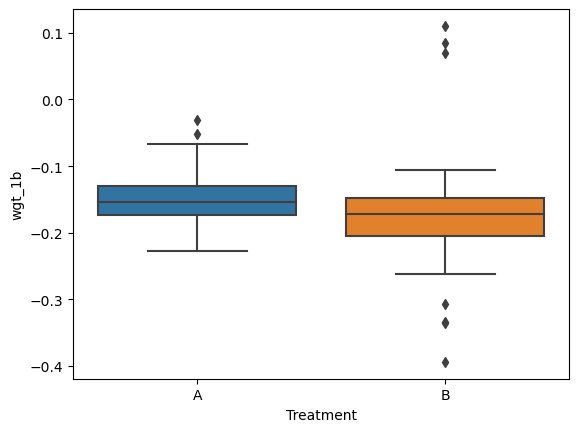

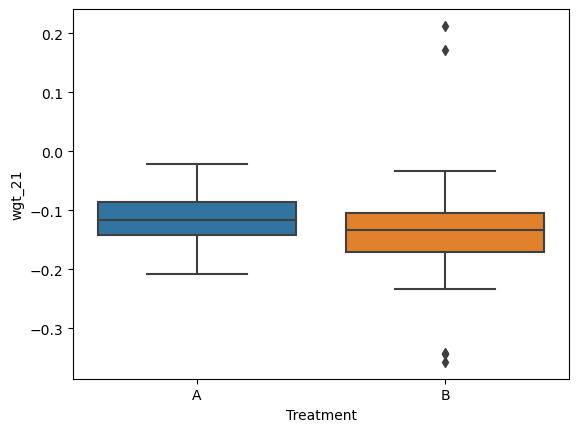

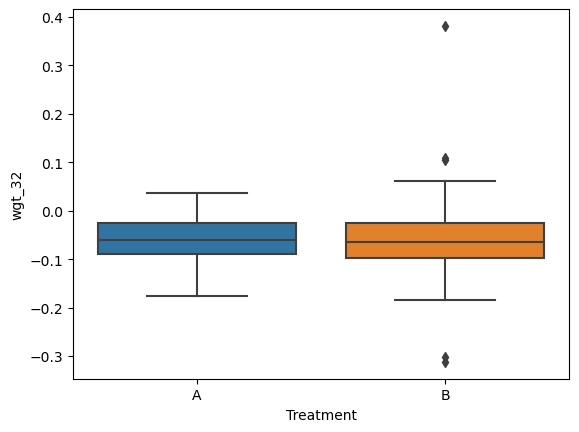

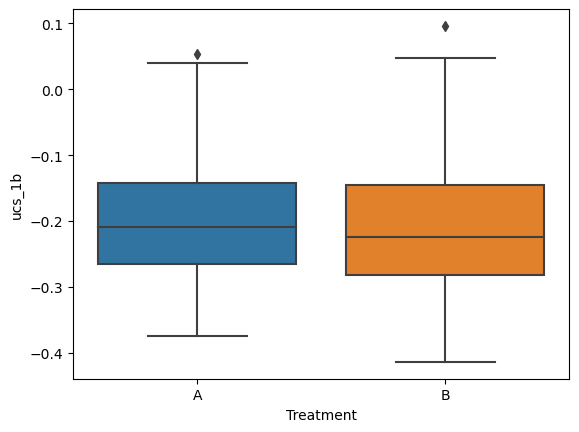

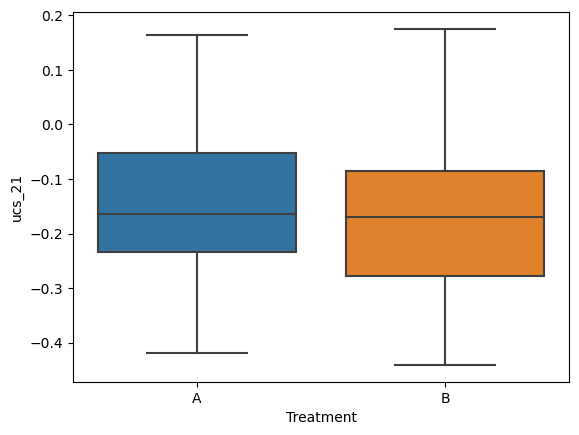

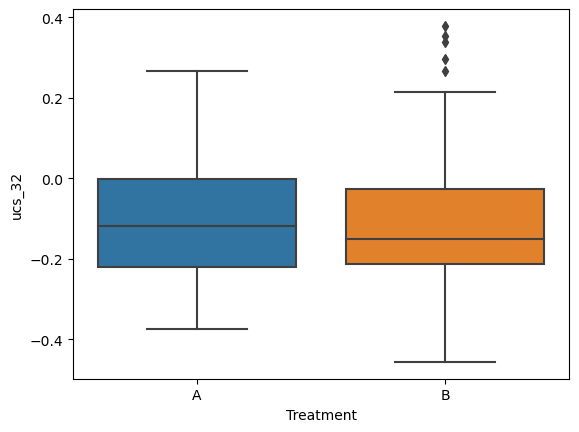

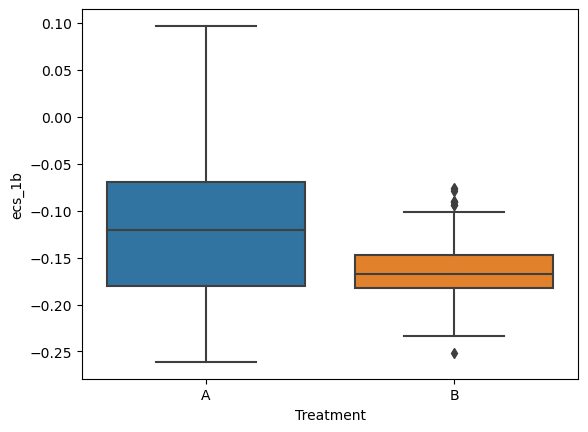

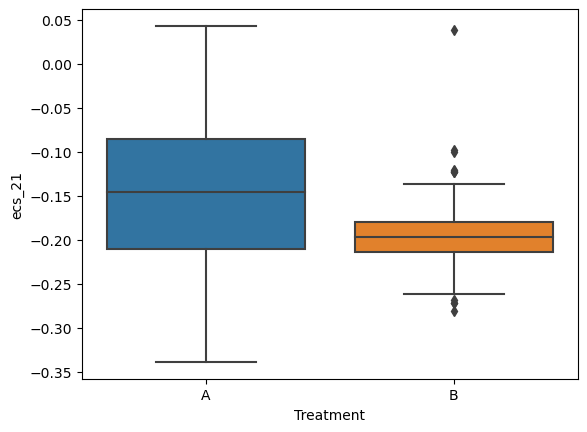

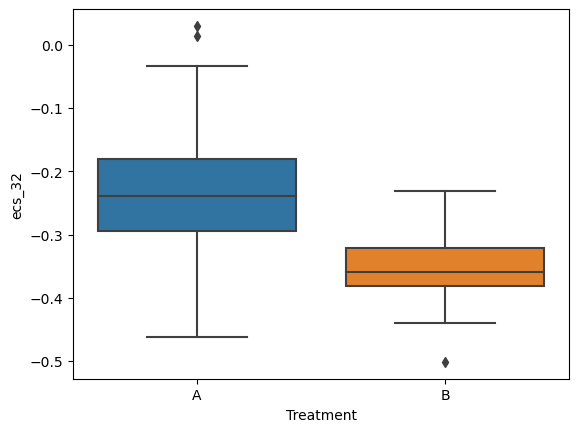

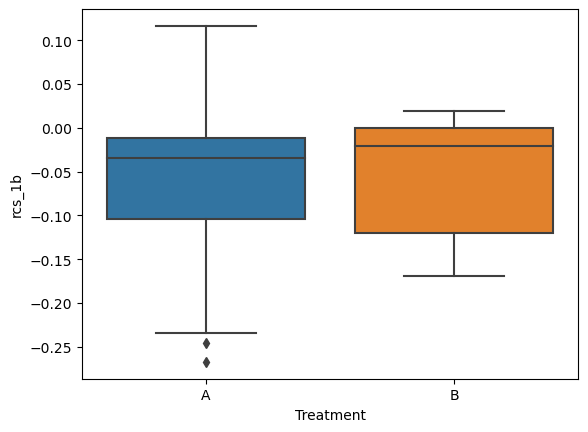

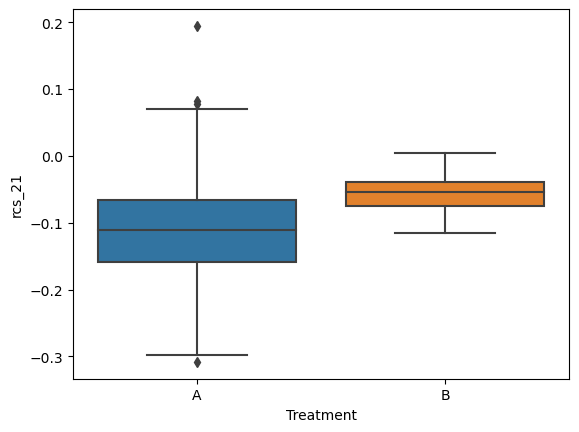

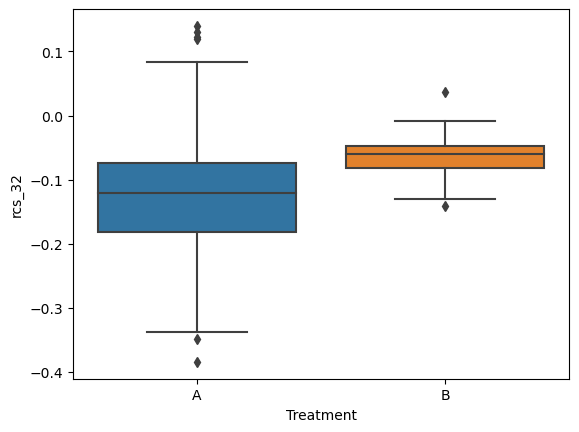

In [13]:
for i in a.columns:
    x = df[i]
    sns.boxplot(y=df[i],x=df['Treatment'])
    plt.show()

In [17]:
columns = [df['ecs_1b'],df['ecs_21'],df['ecs_32']]
data1 = df[['ecs_1b','Treatment']]
data2 = df[['ecs_21','Treatment']]
data3 = df[['ecs_32','Treatment']]

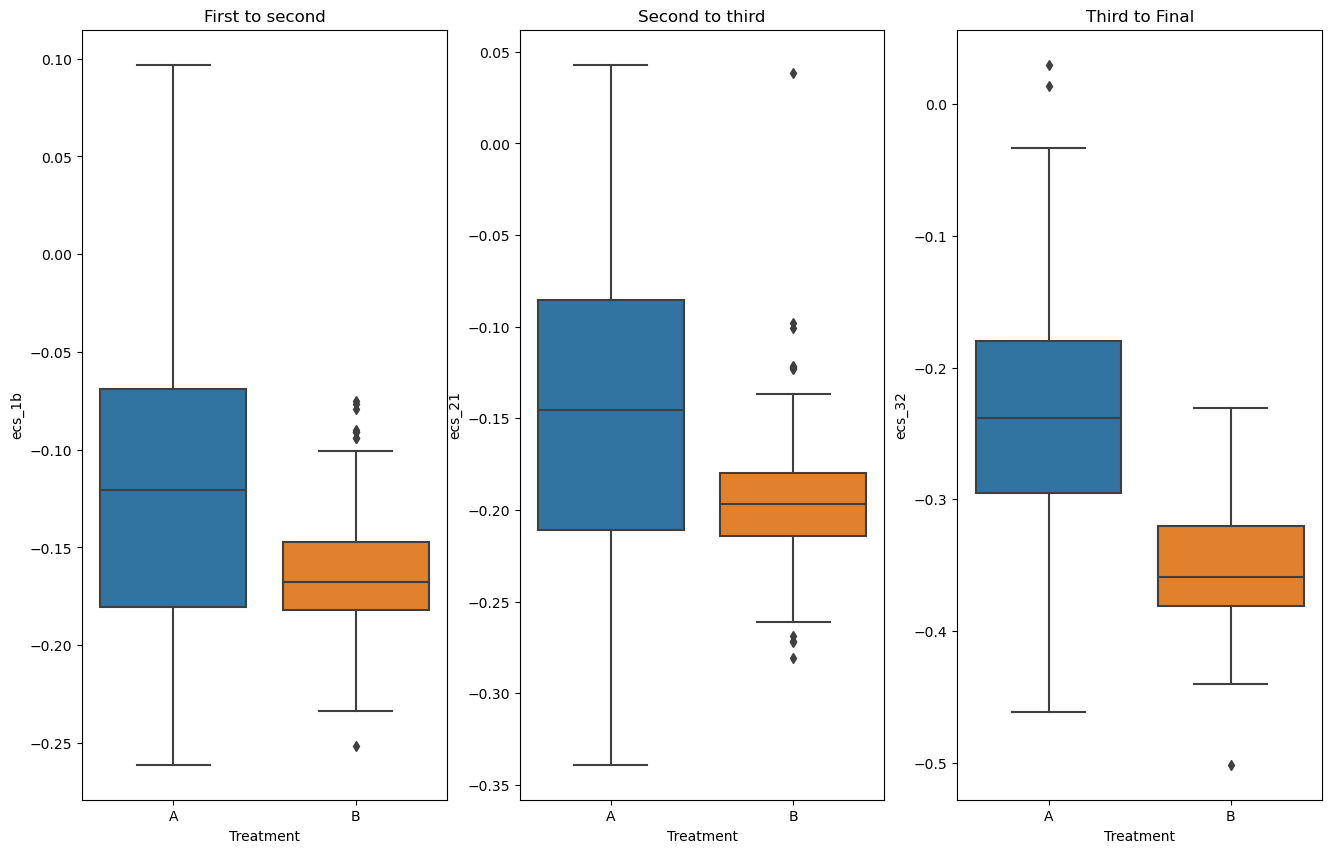

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(16, 10))
sns.boxplot(y=df['ecs_1b'],x=df['Treatment'],ax=axes[0])
axes[0].set_title('First to second')

sns.boxplot(y=df['ecs_21'],x=df['Treatment'],ax=axes[1])
axes[1].set_title('Second to third')

sns.boxplot(y=df['ecs_32'],x=df['Treatment'],ax=axes[2])
axes[2].set_title('Third to Final')

plt.savefig('box.png')


In [29]:
plt.savefig('plot.png')


<Figure size 640x480 with 0 Axes>

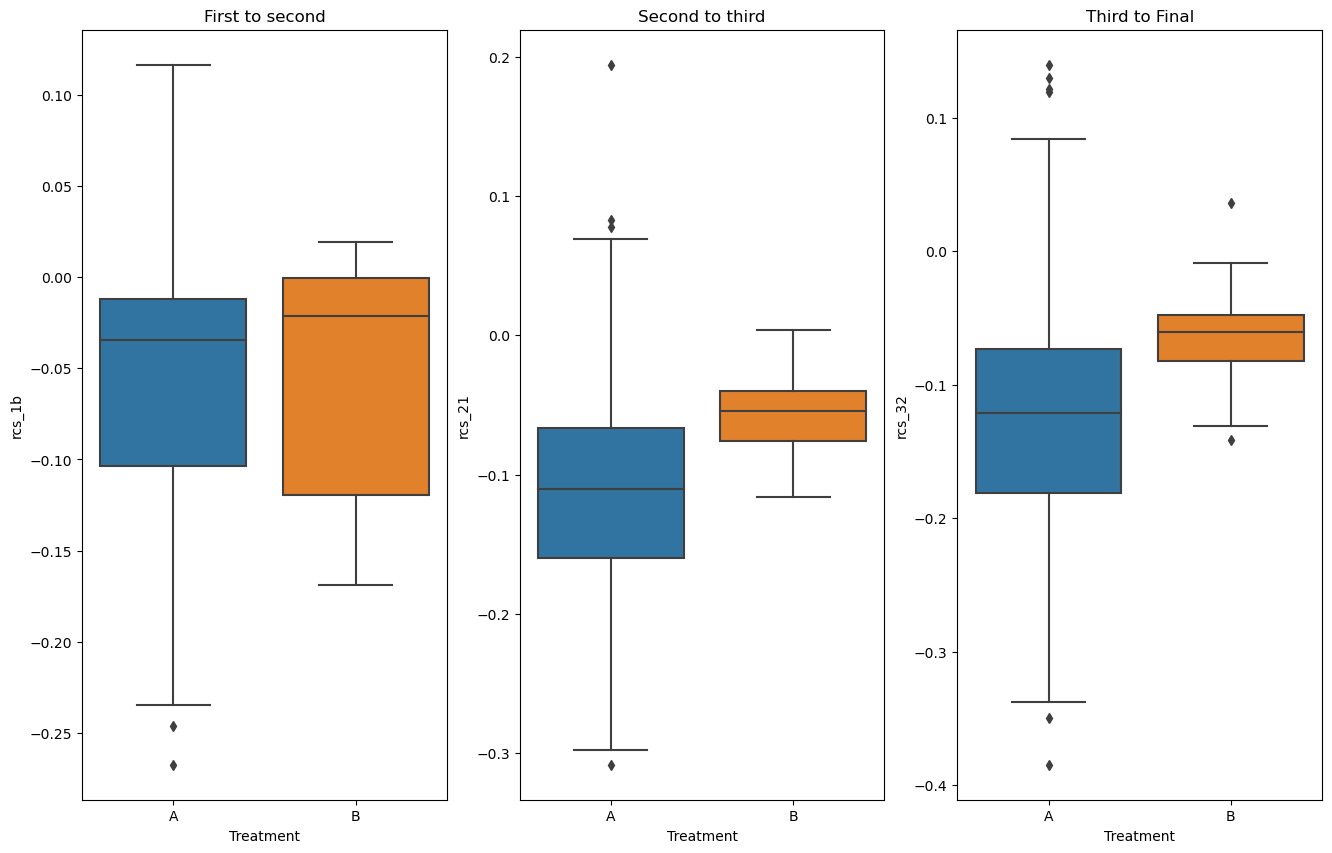

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(16, 10))
sns.boxplot(y=df['rcs_1b'],x=df['Treatment'],ax=axes[0])
axes[0].set_title('First to second')

sns.boxplot(y=df['rcs_21'],x=df['Treatment'],ax=axes[1])
axes[1].set_title('Second to third')

sns.boxplot(y=df['rcs_32'],x=df['Treatment'],ax=axes[2])
axes[2].set_title('Third to Final')

plt.savefig('boxrcs.png')


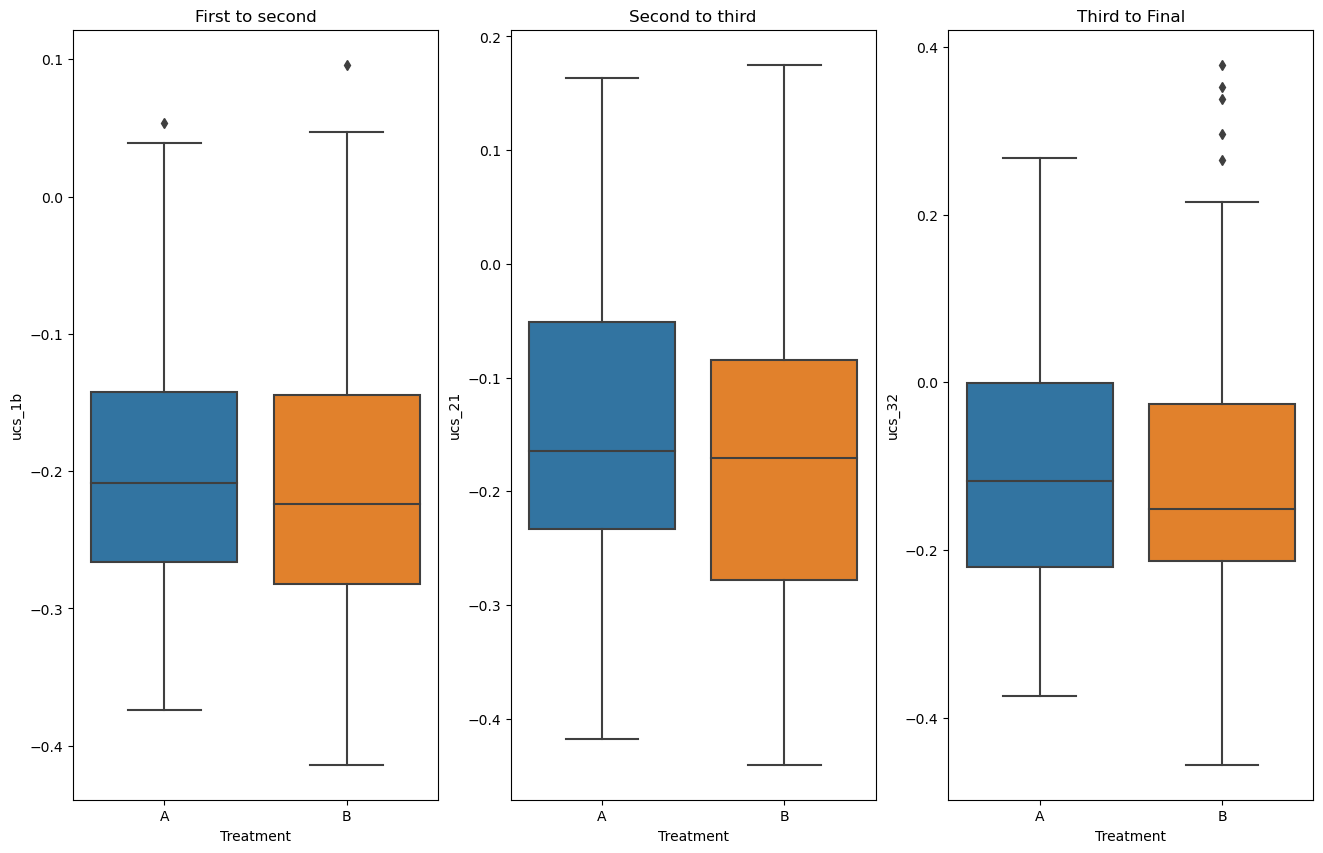

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(16, 10))
sns.boxplot(y=df['ucs_1b'],x=df['Treatment'],ax=axes[0])
axes[0].set_title('First to second')

sns.boxplot(y=df['ucs_21'],x=df['Treatment'],ax=axes[1])
axes[1].set_title('Second to third')

sns.boxplot(y=df['ucs_32'],x=df['Treatment'],ax=axes[2])
axes[2].set_title('Third to Final')

plt.savefig('boxucs.png')


KeyError: 'weight'